##  1. Data Collection !

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob #https://machinelearningtutorials.org/python-glob-module-tutorial-with-examples/
import yfinance as yf
import plotly.express as px

## use Warnings package to get rid of any future warning ..

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)


In [75]:
###Get company data

In [3]:
companyList=['META','AAPL','MSFT','GOOG','AMZN','NFLX']
all_data = pd.DataFrame()

In [4]:
for company in companyList:
    thisCompany = yf.Ticker(company).history(period="5y")
    thisCompany.reset_index(inplace=True)
    thisCompany['Name']=company
    all_data= pd.concat([all_data,thisCompany])

In [6]:
all_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
0,2019-08-05 00:00:00-04:00,184.311252,185.289238,178.972217,181.357315,23086700,0.0,0.0,META
1,2019-08-06 00:00:00-04:00,183.313312,185.408996,182.714536,184.131622,18035700,0.0,0.0,META
2,2019-08-07 00:00:00-04:00,183.223485,185.987793,180.848361,184.770294,15833200,0.0,0.0,META
3,2019-08-08 00:00:00-04:00,186.237286,189.949658,183.672564,189.770035,14828900,0.0,0.0,META
4,2019-08-09 00:00:00-04:00,189.610368,190.588354,186.736269,187.464783,11058800,0.0,0.0,META
...,...,...,...,...,...,...,...,...,...
1254,2024-07-30 00:00:00-04:00,630.169983,634.690002,617.000000,622.580017,3496600,0.0,0.0,NFLX
1255,2024-07-31 00:00:00-04:00,626.570007,633.599976,622.580017,628.349976,3134900,0.0,0.0,NFLX
1256,2024-08-01 00:00:00-04:00,629.250000,646.710022,617.609985,624.849976,3720600,0.0,0.0,NFLX
1257,2024-08-02 00:00:00-04:00,620.979980,625.270020,608.349976,613.640015,3521100,0.0,0.0,NFLX


In [7]:
all_data['Date'] = pd.to_datetime(all_data['Date'])

In [8]:
all_data.shape ## dimensions of all_data dataframe ..

(7554, 9)

In [9]:
all_data['Name'].unique() #get uni

array(['META', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'NFLX'], dtype=object)

## 2. Analysing change in price of the stock over time !

In [10]:
all_data.isnull().sum() ## checking missing values 

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Name            0
dtype: int64

In [11]:
all_data.dtypes ## checking data-types 

Date            datetime64[ns, America/New_York]
Open                                     float64
High                                     float64
Low                                      float64
Close                                    float64
Volume                                     int64
Dividends                                float64
Stock Splits                             float64
Name                                      object
dtype: object

In [12]:
all_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7554 entries, 0 to 1258
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          7554 non-null   datetime64[ns, America/New_York]
 1   Open          7554 non-null   float64                         
 2   High          7554 non-null   float64                         
 3   Low           7554 non-null   float64                         
 4   Close         7554 non-null   float64                         
 5   Volume        7554 non-null   int64                           
 6   Dividends     7554 non-null   float64                         
 7   Stock Splits  7554 non-null   float64                         
 8   Name          7554 non-null   object                          
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1), object(1)
memory usage: 590.2+ KB


In [13]:
all_data['Date']

0      2019-08-05 00:00:00-04:00
1      2019-08-06 00:00:00-04:00
2      2019-08-07 00:00:00-04:00
3      2019-08-08 00:00:00-04:00
4      2019-08-09 00:00:00-04:00
                  ...           
1254   2024-07-30 00:00:00-04:00
1255   2024-07-31 00:00:00-04:00
1256   2024-08-01 00:00:00-04:00
1257   2024-08-02 00:00:00-04:00
1258   2024-08-05 00:00:00-04:00
Name: Date, Length: 7554, dtype: datetime64[ns, America/New_York]

In [59]:
tech_list = all_data['Name'].unique()

In [60]:
tech_list

array(['META', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'NFLX'], dtype=object)

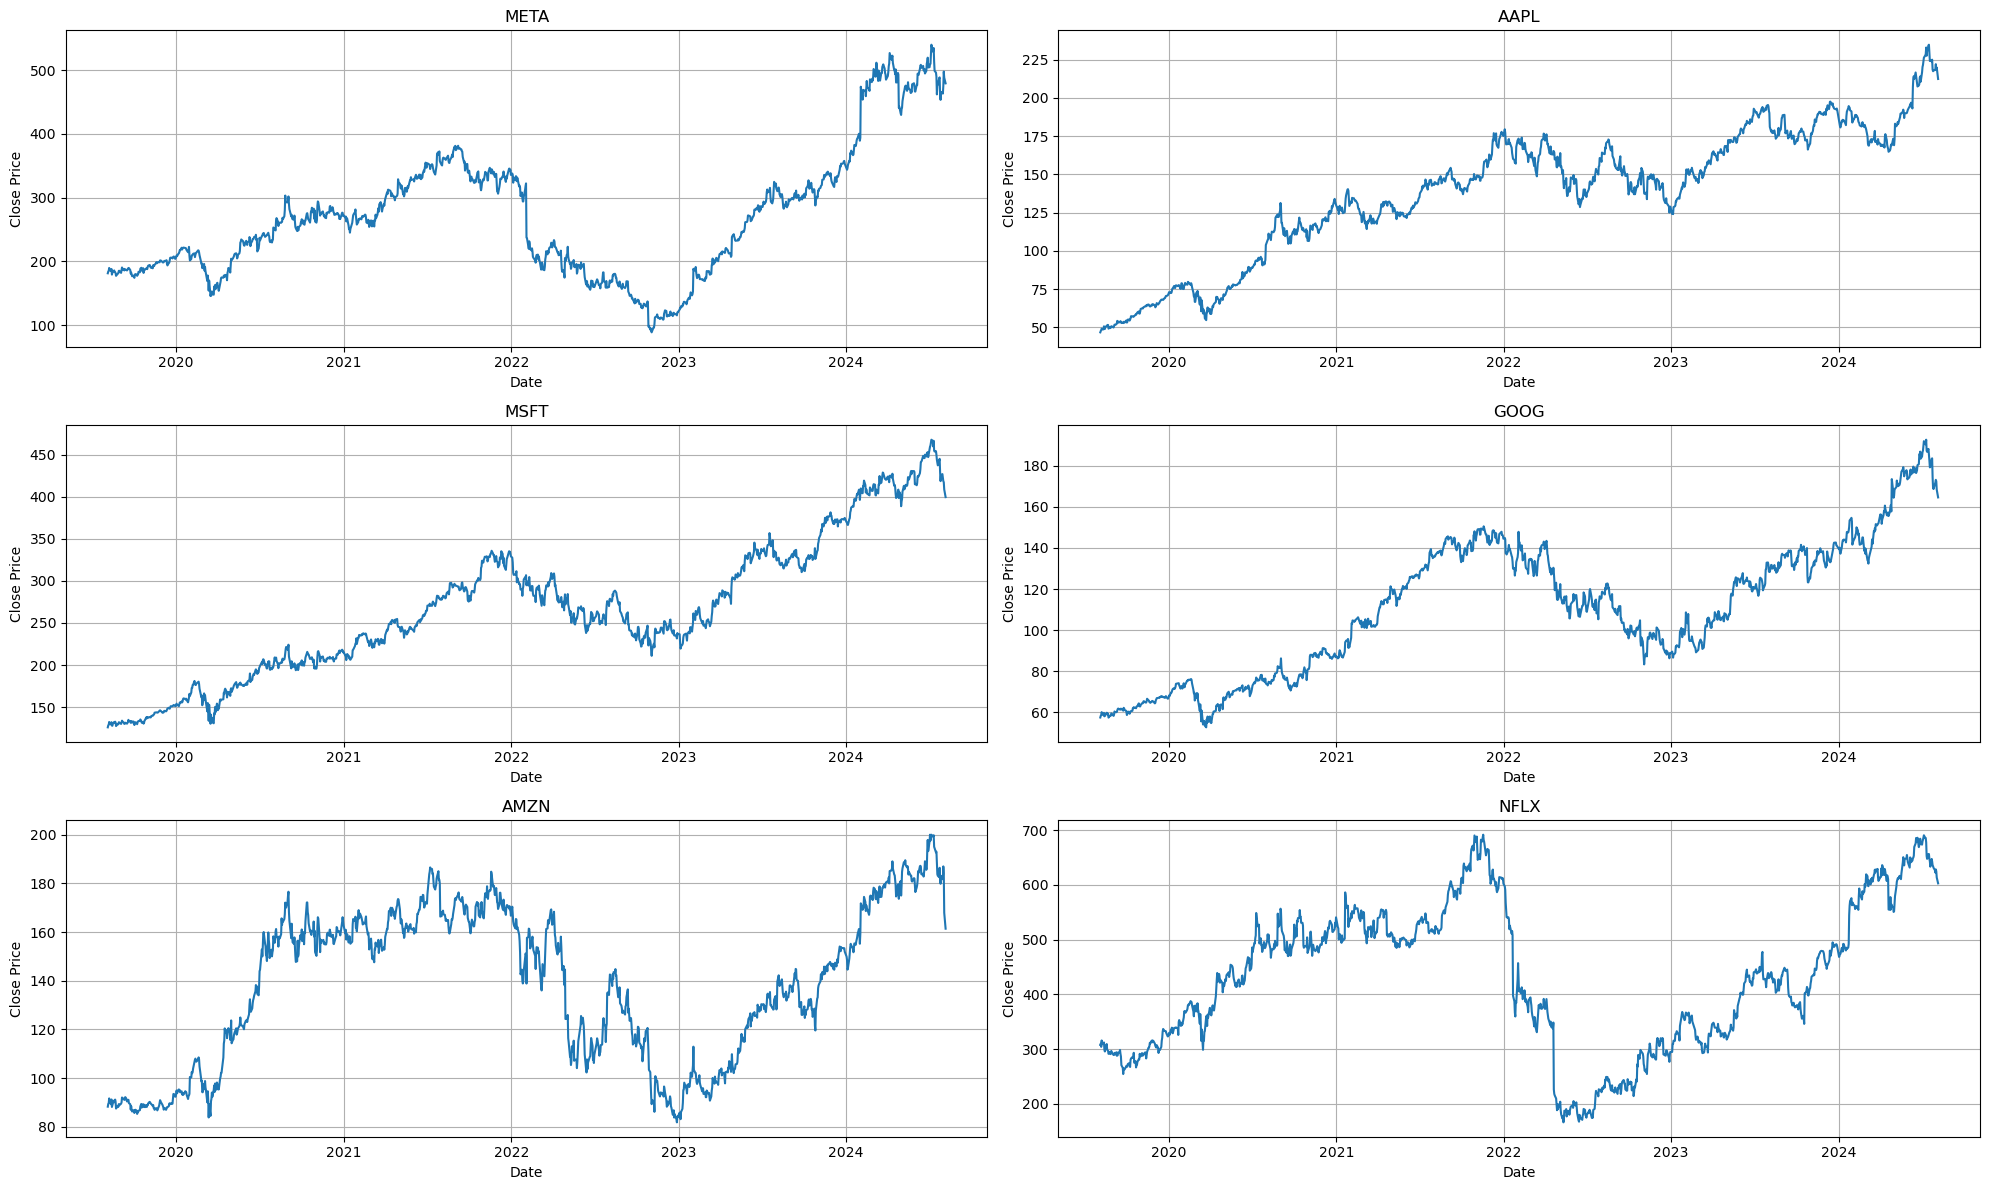

In [15]:
# Creating subplots of closing price for each company for last 5 years
tech_list = all_data['Name'].unique()  # Get unique company names
plt.figure(figsize=(20, 12))

for index, company in enumerate(tech_list, 1):  # create numerical index for list, starting at 1
    plt.subplot(3, 2, index)  # creating subplot for each stock
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['Date'], df['Close'])  # plotting "date" vs "close"
    plt.title(company)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)

#     plt.grid('on', which='minor', axis='y')

plt.tight_layout()
plt.show()


## 3. moving average of the various stocks!

In [16]:
all_data.head(15)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
0,2019-08-05 00:00:00-04:00,184.311252,185.289238,178.972217,181.357315,23086700,0.0,0.0,META
1,2019-08-06 00:00:00-04:00,183.313312,185.408996,182.714536,184.131622,18035700,0.0,0.0,META
2,2019-08-07 00:00:00-04:00,183.223485,185.987793,180.848361,184.770294,15833200,0.0,0.0,META
3,2019-08-08 00:00:00-04:00,186.237286,189.949658,183.672564,189.770035,14828900,0.0,0.0,META
4,2019-08-09 00:00:00-04:00,189.610368,190.588354,186.736269,187.464783,11058800,0.0,0.0,META
5,2019-08-12 00:00:00-04:00,186.466829,187.205302,184.081731,184.989853,10930900,0.0,0.0,META
6,2019-08-13 00:00:00-04:00,185.139554,190.987537,184.989852,188.063538,13577000,0.0,0.0,META
7,2019-08-14 00:00:00-04:00,185.418984,185.608597,178.942288,179.341476,18903700,0.0,0.0,META
8,2019-08-15 00:00:00-04:00,180.578925,182.824311,179.660813,182.215561,12925900,0.0,0.0,META
9,2019-08-16 00:00:00-04:00,183.373173,184.720411,181.986024,183.323273,12654600,0.0,0.0,META


In [18]:
all_data['Close'].rolling(window=10).mean().head(14)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9     184.542775
10    184.985864
11    184.916006
12    184.756335
13    183.945999
Name: Close, dtype: float64

In [47]:
new_data = all_data.copy()

In [48]:
#### now lets consider different windows of rolling ,ie 10 days ,20 days ,30 days 
ma_day = [10 ,20 , 50]

for ma in ma_day:
    new_data['Close_'+str(ma)] = new_data['Close'].rolling(ma).mean()

In [49]:
new_data.tail(7)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Close_10,Close_20,Close_50
1252,2024-07-26 00:00:00-04:00,645.000000,646.989990,629.770020,631.369995,3120700,0.0,0.0,NFLX,642.832007,658.951505,654.658401
1253,2024-07-29 00:00:00-04:00,634.609985,634.609985,623.929993,626.960022,2400500,0.0,0.0,NFLX,639.883008,656.555505,654.927201
1254,2024-07-30 00:00:00-04:00,630.169983,634.690002,617.000000,622.580017,3496600,0.0,0.0,NFLX,636.509009,654.004007,655.168401
1255,2024-07-31 00:00:00-04:00,626.570007,633.599976,622.580017,628.349976,3134900,0.0,0.0,NFLX,634.598004,651.442505,655.313401
1256,2024-08-01 00:00:00-04:00,629.250000,646.710022,617.609985,624.849976,3720600,0.0,0.0,NFLX,632.779004,648.559503,654.994000
1257,2024-08-02 00:00:00-04:00,620.979980,625.270020,608.349976,613.640015,3521100,0.0,0.0,NFLX,630.809003,644.709003,654.254601
1258,2024-08-05 00:00:00-04:00,621.000000,604.460022,588.429993,602.840027,1979308,0.0,0.0,NFLX,626.343005,640.564005,653.502002


In [24]:
new_data.set_index('Date' , inplace=True)

In [91]:
new_data

,index,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Close_10,Close_20,Close_50
Date,,,,,,,,,,,,
2019-08-05 00:00:00-04:00,0,184.311252,185.289238,178.972217,181.357315,23086700,0.0,0.0,META,NaN,NaN,NaN
2019-08-06 00:00:00-04:00,1,183.313312,185.408996,182.714536,184.131622,18035700,0.0,0.0,META,NaN,NaN,NaN
2019-08-07 00:00:00-04:00,2,183.223485,185.987793,180.848361,184.770294,15833200,0.0,0.0,META,NaN,NaN,NaN
2019-08-08 00:00:00-04:00,3,186.237286,189.949658,183.672564,189.770035,14828900,0.0,0.0,META,NaN,NaN,NaN
2019-08-09 00:00:00-04:00,4,189.610368,190.588354,186.736269,187.464783,11058800,0.0,0.0,META,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,1254,630.169983,634.690002,617.000000,622.580017,3496600,0.0,0.0,NFLX,636.509009,654.004007,655.168401
2024-07-31 00:00:00-04:00,1255,626.570007,633.599976,622.580017,628.349976,3134900,0.0,0.0,NFLX,634.598004,651.442505,655.313401
2024-08-01 00:00:00-04:00,1256,629.250000,646.710022,617.609985,624.849976,3720600,0.0,0.0,NFLX,632.779004,648.559503,654.994000


In [92]:
new_data.columns

Index(['index', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Name', 'Close_10', 'Close_20', 'Close_50'],
      dtype='object')

In [87]:
new_data.sort_values('Date')
new_data.reset_index(inplace=True)
new_data.set_index('Date',inplace=True)
new_data

,index,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Close_10,Close_20,Close_50
Date,,,,,,,,,,,,
2019-08-05 00:00:00-04:00,0,184.311252,185.289238,178.972217,181.357315,23086700,0.0,0.0,META,NaN,NaN,NaN
2019-08-06 00:00:00-04:00,1,183.313312,185.408996,182.714536,184.131622,18035700,0.0,0.0,META,NaN,NaN,NaN
2019-08-07 00:00:00-04:00,2,183.223485,185.987793,180.848361,184.770294,15833200,0.0,0.0,META,NaN,NaN,NaN
2019-08-08 00:00:00-04:00,3,186.237286,189.949658,183.672564,189.770035,14828900,0.0,0.0,META,NaN,NaN,NaN
2019-08-09 00:00:00-04:00,4,189.610368,190.588354,186.736269,187.464783,11058800,0.0,0.0,META,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,1254,630.169983,634.690002,617.000000,622.580017,3496600,0.0,0.0,NFLX,636.509009,654.004007,655.168401
2024-07-31 00:00:00-04:00,1255,626.570007,633.599976,622.580017,628.349976,3134900,0.0,0.0,NFLX,634.598004,651.442505,655.313401
2024-08-01 00:00:00-04:00,1256,629.250000,646.710022,617.609985,624.849976,3720600,0.0,0.0,NFLX,632.779004,648.559503,654.994000


[(1, 'META'), (2, 'AAPL'), (3, 'MSFT'), (4, 'GOOG'), (5, 'AMZN'), (6, 'NFLX')]

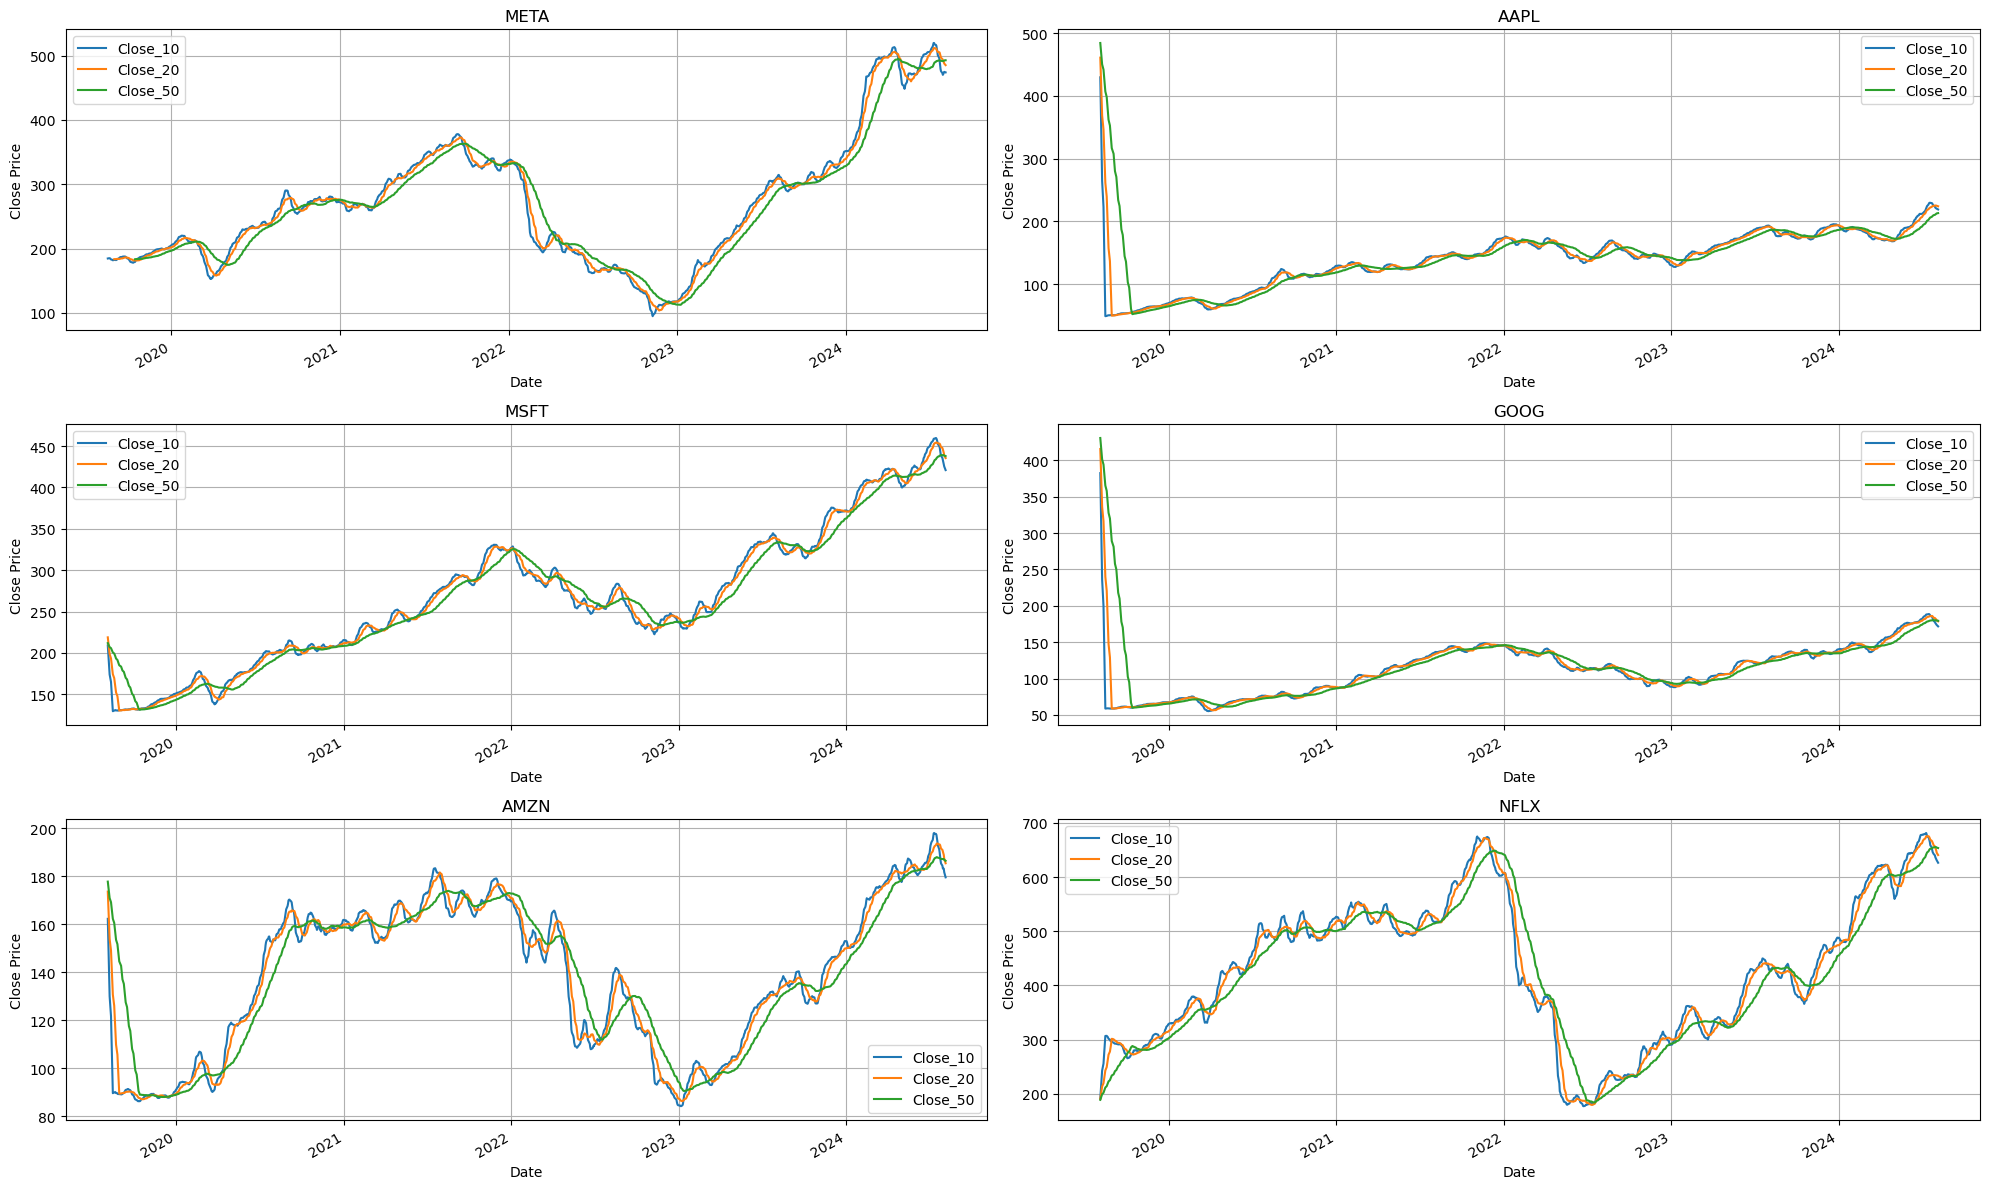

In [94]:
# Creating subplots of closing price for each company for last 5 years
tech_list = new_data['Name'].unique()  # Get unique company names
plt.figure(figsize=(20, 12))

for index, company in enumerate(tech_list, 1):  # create numerical index for list, starting at 1
    plt.subplot(3, 2, index)  # creating subplot for each stock
    filter1 = new_data['Name'] == company
    df = new_data[filter1]
    df[['Close_10','Close_20','Close_50']].plot(ax=plt.gca())  # plotting "date" vs "close"

    plt.title(company)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Date', ylabel='Close'>

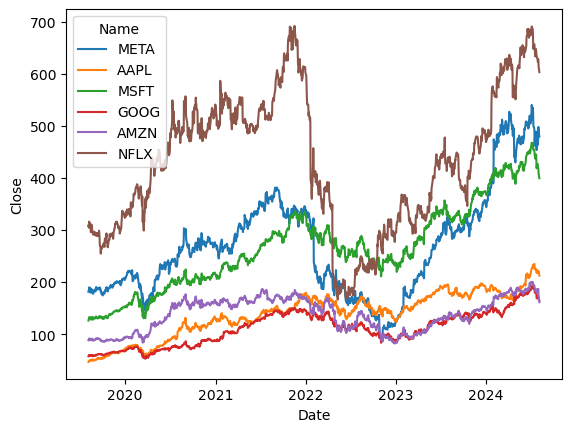

In [97]:
sns.lineplot(new_data,x='Date',y='Close',hue='Name')

## 4. Analyse Closing price (%) change in apple stock !
##### Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [99]:
tech_list

array(['META', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'NFLX'], dtype=object)

In [164]:
AAPL = yf.Ticker('AAPL').history(period="5y")

In [165]:
AAPL.reset_index(inplace=True)
AAPL.head(4)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-08-06 00:00:00-04:00,47.364557,47.789202,46.816863,47.531036,143299200,0.0000,0.0
1,2019-08-07 00:00:00-04:00,47.147416,48.148703,46.763791,48.023239,133457600,0.0000,0.0
2,2019-08-08 00:00:00-04:00,48.303109,49.106553,48.107678,49.082424,108038000,0.0000,0.0
3,2019-08-09 00:00:00-04:00,48.753050,49.106646,48.266243,48.677971,98478800,0.1925,0.0


In [166]:
AAPL['Close']

0        47.531036
1        48.023239
2        49.082424
3        48.677971
4        48.554455
           ...    
1253    218.800003
1254    222.080002
1255    218.360001
1256    219.860001
1257    209.270004
Name: Close, Length: 1258, dtype: float64

In [167]:
AAPL.head(4)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-08-06 00:00:00-04:00,47.364557,47.789202,46.816863,47.531036,143299200,0.0000,0.0
1,2019-08-07 00:00:00-04:00,47.147416,48.148703,46.763791,48.023239,133457600,0.0000,0.0
2,2019-08-08 00:00:00-04:00,48.303109,49.106553,48.107678,49.082424,108038000,0.0000,0.0
3,2019-08-09 00:00:00-04:00,48.753050,49.106646,48.266243,48.677971,98478800,0.1925,0.0


In [168]:
AAPL['Daily return(in %)'] = AAPL['Close'].pct_change()

### pct_change() returns : Percentage change between the current and a prior element.

In [169]:
AAPL.head(4)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily return(in %)
0,2019-08-06 00:00:00-04:00,47.364557,47.789202,46.816863,47.531036,143299200,0.0000,0.0,NaN
1,2019-08-07 00:00:00-04:00,47.147416,48.148703,46.763791,48.023239,133457600,0.0000,0.0,0.010355
2,2019-08-08 00:00:00-04:00,48.303109,49.106553,48.107678,49.082424,108038000,0.0000,0.0,0.022056
3,2019-08-09 00:00:00-04:00,48.753050,49.106646,48.266243,48.677971,98478800,0.1925,0.0,-0.008240


In [170]:
AAPL.dtypes

Date                  datetime64[ns, America/New_York]
Open                                           float64
High                                           float64
Low                                            float64
Close                                          float64
Volume                                           int64
Dividends                                      float64
Stock Splits                                   float64
Daily return(in %)                             float64
dtype: object

In [171]:
layout =dict(tickformat=".2%")

#create chart for daily returns for AAPL
fig=px.line(AAPL , x="Date" , y="Daily return(in %)",labels=layout) ## Plotting Line-plot of "date" vs "Daily return(in %)"..

# Update y-axis to show percentage
fig.update_layout(
    yaxis=dict(
        tickformat=".2%",
        title='Percentage'
    )
)

# Show the plot
fig.show()

## 5. Performing resampling analysis of closing price


<!--    Before doing resampling,first u have to make your date feature 'row-index' so that u can resample data on various basis : -->
    
    a..yearly('Y')  , 
    b..quarterly('Q')   ,
    c..monthly('M') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')
    
    --!>
    

In [172]:
AAPL.dtypes

Date                  datetime64[ns, America/New_York]
Open                                           float64
High                                           float64
Low                                            float64
Close                                          float64
Volume                                           int64
Dividends                                      float64
Stock Splits                                   float64
Daily return(in %)                             float64
dtype: object

In [173]:
AAPL['Date'] =pd.to_datetime(AAPL['Date'])

In [174]:
AAPL.dtypes

Date                  datetime64[ns, America/New_York]
Open                                           float64
High                                           float64
Low                                            float64
Close                                          float64
Volume                                           int64
Dividends                                      float64
Stock Splits                                   float64
Daily return(in %)                             float64
dtype: object

In [175]:
AAPL.head(4)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily return(in %)
0,2019-08-06 00:00:00-04:00,47.364557,47.789202,46.816863,47.531036,143299200,0.0000,0.0,NaN
1,2019-08-07 00:00:00-04:00,47.147416,48.148703,46.763791,48.023239,133457600,0.0000,0.0,0.010355
2,2019-08-08 00:00:00-04:00,48.303109,49.106553,48.107678,49.082424,108038000,0.0000,0.0,0.022056
3,2019-08-09 00:00:00-04:00,48.753050,49.106646,48.266243,48.677971,98478800,0.1925,0.0,-0.008240


In [176]:
AAPL.set_index('Date' , inplace=True)

In [177]:
AAPL.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily return(in %)
Date,,,,,,,,
2019-08-06 00:00:00-04:00,47.364557,47.789202,46.816863,47.531036,143299200,0.0000,0.0,NaN
2019-08-07 00:00:00-04:00,47.147416,48.148703,46.763791,48.023239,133457600,0.0000,0.0,0.010355
2019-08-08 00:00:00-04:00,48.303109,49.106553,48.107678,49.082424,108038000,0.0000,0.0,0.022056
2019-08-09 00:00:00-04:00,48.753050,49.106646,48.266243,48.677971,98478800,0.1925,0.0,-0.008240


In [178]:
AAPL['Close'].resample('M').mean() ## resample data on monthly basis ..

Date
2019-08-31 00:00:00-04:00     49.725780
2019-09-30 00:00:00-04:00     52.796429
2019-10-31 00:00:00-04:00     56.984282
2019-11-30 00:00:00-05:00     63.733628
2019-12-31 00:00:00-05:00     67.173111
2020-01-31 00:00:00-05:00     75.770105
2020-02-29 00:00:00-05:00     75.754041
2020-03-31 00:00:00-04:00     63.903734
2020-04-30 00:00:00-04:00     66.324580
2020-05-31 00:00:00-04:00     75.635219
2020-06-30 00:00:00-04:00     84.429934
2020-07-31 00:00:00-04:00     93.331446
2020-08-31 00:00:00-04:00    114.726163
2020-09-30 00:00:00-04:00    112.635769
2020-10-31 00:00:00-04:00    113.895865
2020-11-30 00:00:00-05:00    114.458699
2020-12-31 00:00:00-05:00    124.752783
2021-01-31 00:00:00-05:00    130.384608
2021-02-28 00:00:00-05:00    129.060329
2021-03-31 00:00:00-04:00    119.620154
2021-04-30 00:00:00-04:00    129.378072
2021-05-31 00:00:00-04:00    124.610275
2021-06-30 00:00:00-04:00    127.774765
2021-07-31 00:00:00-04:00    142.700551
2021-08-31 00:00:00-04:00    145.86

<Axes: xlabel='Date'>

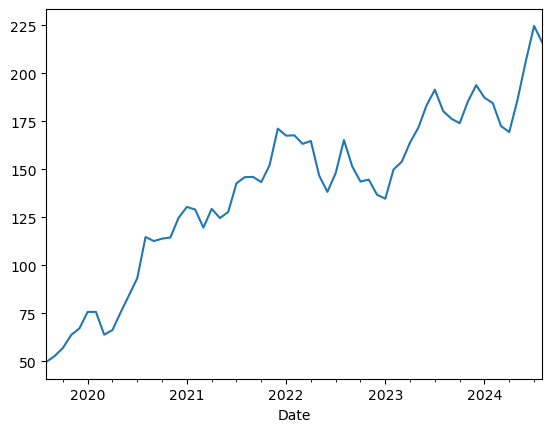

In [179]:
AAPL['Close'].resample('M').mean().plot()

In [180]:
AAPL['Close'].resample('Y').mean() ## resample data on Yearly basis ..

Date
2019-12-31 00:00:00-05:00     58.220047
2020-12-31 00:00:00-05:00     93.149000
2021-12-31 00:00:00-05:00    138.658529
2022-12-31 00:00:00-05:00    153.120458
2023-12-31 00:00:00-05:00    171.668915
2024-12-31 00:00:00-05:00    190.608505
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

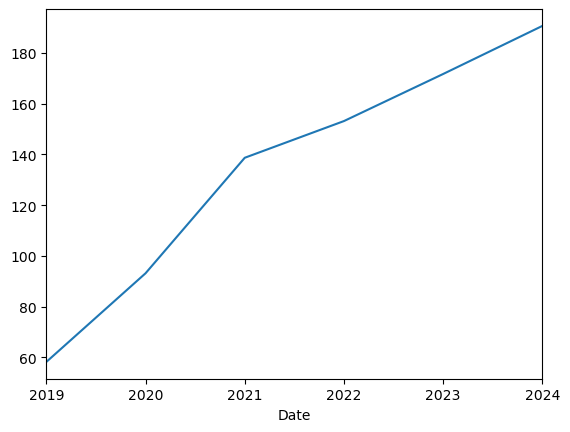

In [181]:
AAPL['Close'].resample('Y').mean().plot() 

In [183]:
AAPL['Close'].resample('Q').mean() ## resample data on Quarterly basis ..

Date
2019-09-30 00:00:00-04:00     51.300472
2019-12-31 00:00:00-05:00     62.436662
2020-03-31 00:00:00-04:00     71.554534
2020-06-30 00:00:00-04:00     75.602843
2020-09-30 00:00:00-04:00    106.685819
2020-12-31 00:00:00-05:00    117.803816
2021-03-31 00:00:00-04:00    125.913399
2021-06-30 00:00:00-04:00    127.304601
2021-09-30 00:00:00-04:00    144.882192
2021-12-31 00:00:00-05:00    155.759090
2022-03-31 00:00:00-04:00    165.958880
2022-06-30 00:00:00-04:00    149.651980
2022-09-30 00:00:00-04:00    155.331949
2022-12-31 00:00:00-05:00    141.652647
2023-03-31 00:00:00-04:00    146.476711
2023-06-30 00:00:00-04:00    173.226245
2023-09-30 00:00:00-04:00    182.548330
2023-12-31 00:00:00-05:00    184.049216
2024-03-31 00:00:00-04:00    181.478264
2024-06-30 00:00:00-04:00    186.378302
2024-09-30 00:00:00-04:00    223.546401
Freq: Q-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

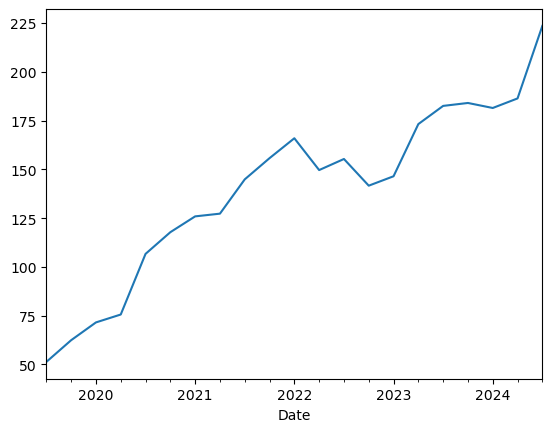

In [184]:
AAPL['Close'].resample('Q').mean().plot()

## 6.. Whether closing prices of these tech companies (Amazon,Apple,Google,Microsoft) are correlated or not !

In [190]:
tech_list

array(['META', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'NFLX'], dtype=object)

In [191]:
tech_list[0]

'META'

In [192]:
META = yf.Ticker(tech_list[0]).history(period="5y")
AAPL = yf.Ticker(tech_list[1]).history(period="5y")
MSFT = yf.Ticker(tech_list[2]).history(period="5y")
GOOG = yf.Ticker(tech_list[3]).history(period="5y")
AMZN = yf.Ticker(tech_list[4]).history(period="5y")
NFLX = yf.Ticker(tech_list[5]).history(period="5y")

In [258]:
closing_price = pd.DataFrame()

In [260]:
closing_price['AAPL_close'] = AAPL['Close']
closing_price['AMZN_close'] = AMZN['Close']
closing_price['GOOG_close'] = GOOG['Close']
closing_price['MSFT_close'] = MSFT['Close']
closing_price['NFLX_close'] = NFLX['Close']
closing_price['META_close'] = META['Close']

In [261]:
closing_price

,AAPL_close,AMZN_close,GOOG_close,MSFT_close,NFLX_close,META_close
Date,,,,,,
2019-08-06 00:00:00-04:00,47.531033,89.391502,58.431011,128.453293,310.100006,184.131607
2019-08-07 00:00:00-04:00,48.023239,89.669998,58.632778,129.015976,304.290009,184.770309
2019-08-08 00:00:00-04:00,49.082428,91.644501,60.171528,132.458832,315.899994,189.770035
2019-08-09 00:00:00-04:00,48.677963,90.378998,59.332985,131.333466,308.929993,187.464783
2019-08-12 00:00:00-04:00,48.554455,89.246002,58.668739,129.502304,310.829987,184.989853
...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,218.800003,181.710007,171.860001,422.920013,622.580017,463.190002
2024-07-31 00:00:00-04:00,222.080002,186.979996,173.149994,418.350006,628.349976,474.829987
2024-08-01 00:00:00-04:00,218.360001,184.070007,172.449997,417.109985,624.849976,497.739990


In [262]:
# A pair-plot is all about creating a scatterplot comparing pairs of values

# Unique plots : 6 unique plots

# Total plots : 15 ( 6 unique + 6 mirror images of these 
# unique one + 3 diagonal plots(histogram))


# Disadvantages: 
## Can't be used when number of features are high.
## Cannot visualize higher dimensional patterns in 3-D and 4-D. 
## Only possible to view 2D patterns.

# NOTE: the diagonal elements are (histograms) for each feature.



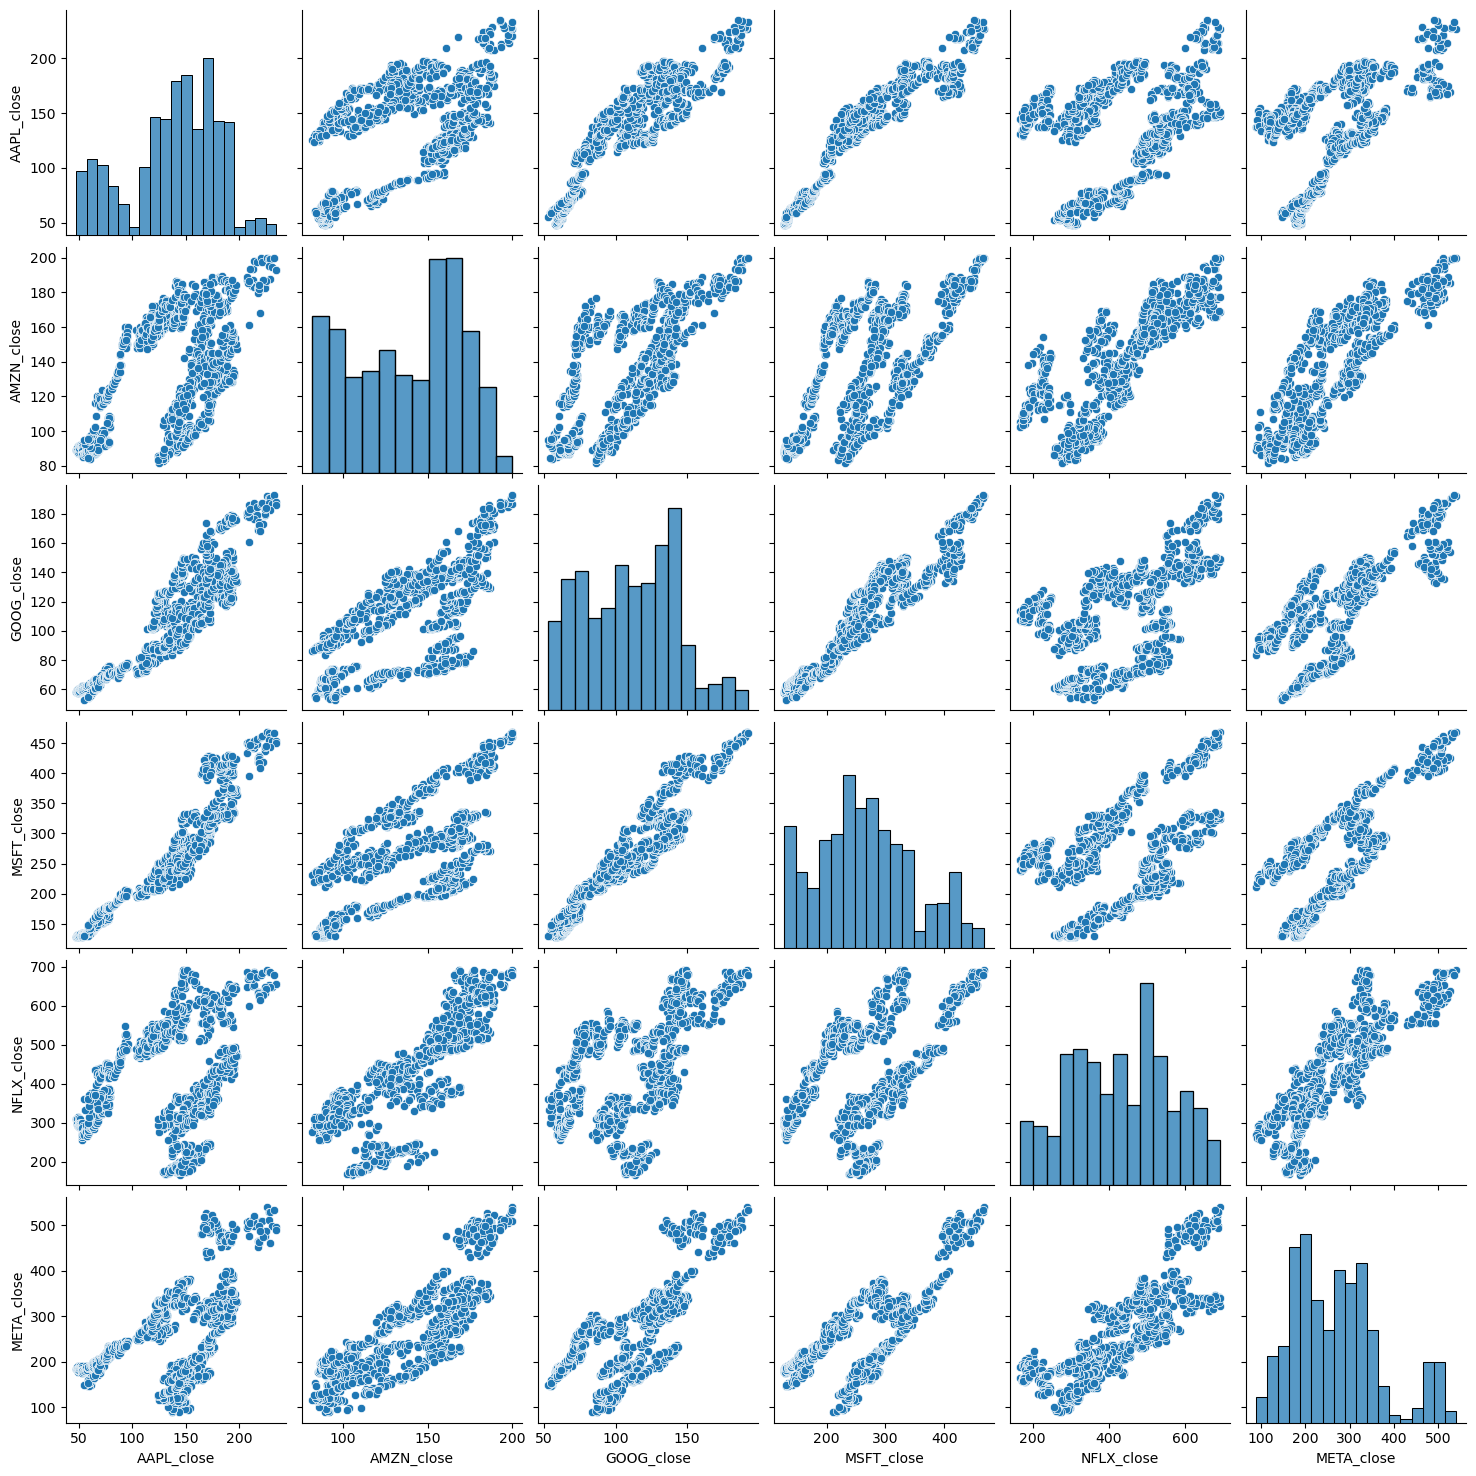

In [263]:
sns.pairplot(closing_price)

In [264]:
closing_price.corr()

,AAPL_close,AMZN_close,GOOG_close,MSFT_close,NFLX_close,META_close
AAPL_close,1.000000,0.523947,0.888316,0.928690,0.332206,0.545416
AMZN_close,0.523947,1.000000,0.689672,0.616596,0.837710,0.806857
GOOG_close,0.888316,0.689672,1.000000,0.939241,0.526877,0.743807
MSFT_close,0.928690,0.616596,0.939241,1.000000,0.510308,0.758655
NFLX_close,0.332206,0.837710,0.526877,0.510308,1.000000,0.835908
META_close,0.545416,0.806857,0.743807,0.758655,0.835908,1.000000


#### co-relation plot for stock prices

<Axes: >

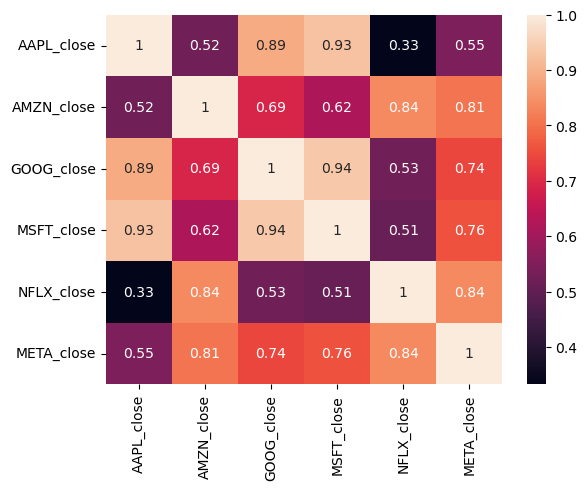

In [246]:
sns.heatmap(closing_price.corr() , annot=True)

In [ ]:
'''

Conclusions : 
Closing price of Google and Microsoft are well correlated
& Closing price of Amazon and Microsoft have a co-relation of 0.62

META and NFLX have the lowest correlation. MSFT has the highest focus on enterprise, and NFLX has the highest focus on consumer entertainment
'''

## 7. Analyze whether daily change in Closing Price of stocks or Daily Returns of stocks are co-related or not !

In [265]:
closing_price

,AAPL_close,AMZN_close,GOOG_close,MSFT_close,NFLX_close,META_close
Date,,,,,,
2019-08-06 00:00:00-04:00,47.531033,89.391502,58.431011,128.453293,310.100006,184.131607
2019-08-07 00:00:00-04:00,48.023239,89.669998,58.632778,129.015976,304.290009,184.770309
2019-08-08 00:00:00-04:00,49.082428,91.644501,60.171528,132.458832,315.899994,189.770035
2019-08-09 00:00:00-04:00,48.677963,90.378998,59.332985,131.333466,308.929993,187.464783
2019-08-12 00:00:00-04:00,48.554455,89.246002,58.668739,129.502304,310.829987,184.989853
...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,218.800003,181.710007,171.860001,422.920013,622.580017,463.190002
2024-07-31 00:00:00-04:00,222.080002,186.979996,173.149994,418.350006,628.349976,474.829987
2024-08-01 00:00:00-04:00,218.360001,184.070007,172.449997,417.109985,624.849976,497.739990


In [266]:
closing_price['AAPL_close']

Date
2019-08-06 00:00:00-04:00     47.531033
2019-08-07 00:00:00-04:00     48.023239
2019-08-08 00:00:00-04:00     49.082428
2019-08-09 00:00:00-04:00     48.677963
2019-08-12 00:00:00-04:00     48.554455
                                ...    
2024-07-30 00:00:00-04:00    218.800003
2024-07-31 00:00:00-04:00    222.080002
2024-08-01 00:00:00-04:00    218.360001
2024-08-02 00:00:00-04:00    219.860001
2024-08-05 00:00:00-04:00    209.270004
Name: AAPL_close, Length: 1258, dtype: float64

In [267]:
closing_price['AAPL_close'].shift(1)
# Shift index by desired number of periods with an optional time freq.
# When freq is not passed, shift the index without realigning the data. If freq is passed (in this case, the index must be date or datetime,

Date
2019-08-06 00:00:00-04:00           NaN
2019-08-07 00:00:00-04:00     47.531033
2019-08-08 00:00:00-04:00     48.023239
2019-08-09 00:00:00-04:00     49.082428
2019-08-12 00:00:00-04:00     48.677963
                                ...    
2024-07-30 00:00:00-04:00    218.240005
2024-07-31 00:00:00-04:00    218.800003
2024-08-01 00:00:00-04:00    222.080002
2024-08-02 00:00:00-04:00    218.360001
2024-08-05 00:00:00-04:00    219.860001
Name: AAPL_close, Length: 1258, dtype: float64

In [268]:
(closing_price['AAPL_close'] - closing_price['AAPL_close'].shift(1))/closing_price['AAPL_close'].shift(1) #% change in a day

Date
2019-08-06 00:00:00-04:00         NaN
2019-08-07 00:00:00-04:00    0.010355
2019-08-08 00:00:00-04:00    0.022056
2019-08-09 00:00:00-04:00   -0.008241
2019-08-12 00:00:00-04:00   -0.002537
                               ...   
2024-07-30 00:00:00-04:00    0.002566
2024-07-31 00:00:00-04:00    0.014991
2024-08-01 00:00:00-04:00   -0.016751
2024-08-02 00:00:00-04:00    0.006869
2024-08-05 00:00:00-04:00   -0.048167
Name: AAPL_close, Length: 1258, dtype: float64

In [269]:
closing_price.head(10)

,AAPL_close,AMZN_close,GOOG_close,MSFT_close,NFLX_close,META_close
Date,,,,,,
2019-08-06 00:00:00-04:00,47.531033,89.391502,58.431011,128.453293,310.100006,184.131607
2019-08-07 00:00:00-04:00,48.023239,89.669998,58.632778,129.015976,304.290009,184.770309
2019-08-08 00:00:00-04:00,49.082428,91.644501,60.171528,132.458832,315.899994,189.770035
2019-08-09 00:00:00-04:00,48.677963,90.378998,59.332985,131.333466,308.929993,187.464783
2019-08-12 00:00:00-04:00,48.554455,89.246002,58.668739,129.502304,310.829987,184.989853
2019-08-13 00:00:00-04:00,50.610661,91.217003,59.795456,132.182220,312.279999,188.063538
2019-08-14 00:00:00-04:00,49.104225,88.148003,58.148331,128.201630,299.109985,179.341476
2019-08-15 00:00:00-04:00,48.859623,88.806000,58.296661,127.914566,295.760010,182.215561
2019-08-16 00:00:00-04:00,50.012444,89.628502,58.813076,130.258942,302.799988,183.323288


In [274]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100
#loop thorugh columns in closing price.
# For each colummn, perform calculation and add calculated column to dataframe. Index is not cincluded

In [275]:
closing_price.head(10)

,AAPL_close,AMZN_close,GOOG_close,MSFT_close,NFLX_close,META_close,AAPL_close_pct_change,AMZN_close_pct_change,GOOG_close_pct_change,MSFT_close_pct_change,NFLX_close_pct_change,META_close_pct_change
Date,,,,,,,,,,,,
2019-08-06 00:00:00-04:00,47.531033,89.391502,58.431011,128.453293,310.100006,184.131607,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07 00:00:00-04:00,48.023239,89.669998,58.632778,129.015976,304.290009,184.770309,1.035548,0.311546,0.345308,0.438045,-1.873588,0.346873
2019-08-08 00:00:00-04:00,49.082428,91.644501,60.171528,132.458832,315.899994,189.770035,2.205576,2.201966,2.624385,2.668550,3.815434,2.705914
2019-08-09 00:00:00-04:00,48.677963,90.378998,59.332985,131.333466,308.929993,187.464783,-0.824052,-1.380883,-1.393588,-0.849597,-2.206395,-1.214761
2019-08-12 00:00:00-04:00,48.554455,89.246002,58.668739,129.502304,310.829987,184.989853,-0.253726,-1.253605,-1.119522,-1.394284,0.615024,-1.320211
2019-08-13 00:00:00-04:00,50.610661,91.217003,59.795456,132.182220,312.279999,188.063538,4.234845,2.208503,1.920472,2.069397,0.466497,1.661542
2019-08-14 00:00:00-04:00,49.104225,88.148003,58.148331,128.201630,299.109985,179.341476,-2.976518,-3.364505,-2.754599,-3.011442,-4.217373,-4.637827
2019-08-15 00:00:00-04:00,48.859623,88.806000,58.296661,127.914566,295.760010,182.215561,-0.498129,0.746469,0.255090,-0.223916,-1.119981,1.602577
2019-08-16 00:00:00-04:00,50.012444,89.628502,58.813076,130.258942,302.799988,183.323288,2.359455,0.926179,0.885839,1.832767,2.380301,0.607921


In [276]:
closing_price.columns

Index(['AAPL_close', 'AMZN_close', 'GOOG_close', 'MSFT_close', 'NFLX_close',
       'META_close', 'AAPL_close_pct_change', 'AMZN_close_pct_change',
       'GOOG_close_pct_change', 'MSFT_close_pct_change',
       'NFLX_close_pct_change', 'META_close_pct_change'],
      dtype='object')

In [279]:
clsing_p = closing_price[['AAPL_close_pct_change','AMZN_close_pct_change','GOOG_close_pct_change','MSFT_close_pct_change','NFLX_close_pct_change','META_close_pct_change']]

In [280]:
clsing_p

,AAPL_close_pct_change,AMZN_close_pct_change,GOOG_close_pct_change,MSFT_close_pct_change,NFLX_close_pct_change,META_close_pct_change
Date,,,,,,
2019-08-06 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-07 00:00:00-04:00,1.035548,0.311546,0.345308,0.438045,-1.873588,0.346873
2019-08-08 00:00:00-04:00,2.205576,2.201966,2.624385,2.668550,3.815434,2.705914
2019-08-09 00:00:00-04:00,-0.824052,-1.380883,-1.393588,-0.849597,-2.206395,-1.214761
2019-08-12 00:00:00-04:00,-0.253726,-1.253605,-1.119522,-1.394284,0.615024,-1.320211
...,...,...,...,...,...,...
2024-07-30 00:00:00-04:00,0.256597,-0.813313,0.426574,-0.892836,-0.698610,-0.541107
2024-07-31 00:00:00-04:00,1.499085,2.900219,0.750607,-1.080584,0.926782,2.513004
2024-08-01 00:00:00-04:00,-1.675073,-1.556310,-0.404272,-0.296407,-0.557014,4.824886


In [ ]:
### since we have used Pairplot already , lets use extension of Pairplot , ie Pairgrid :

In [ ]:
'''
Pairplot : we have histogram on diagonals & scatterplot/kde/
            any_other_plot which tells the distribution.. on rest of the plot 

Pairgrid : Once we create grid , we can set plot as per our need : 

ie., if we have 4 features , it creates total 16 graphs/plots or matrices of 4*4

    There are various possibilities for type of plots in our Pairgrid which we can set as per our need :

    a) all plots can be scatterplot
    b) on diagonal , we have histogram & rest will be scatterplot
    c) on diagonal , we have histogram & rest will be kdeplot 
    c) on diagonal , we have histogram & below diagonal will be kdeplot
            & upper diagonal will be scatterplot 

Note :: kdeplot for 2 features also known as contour plots which returns density
but kdeplot returns distribution if we are performing univariate analysis else it will show density ..

'''

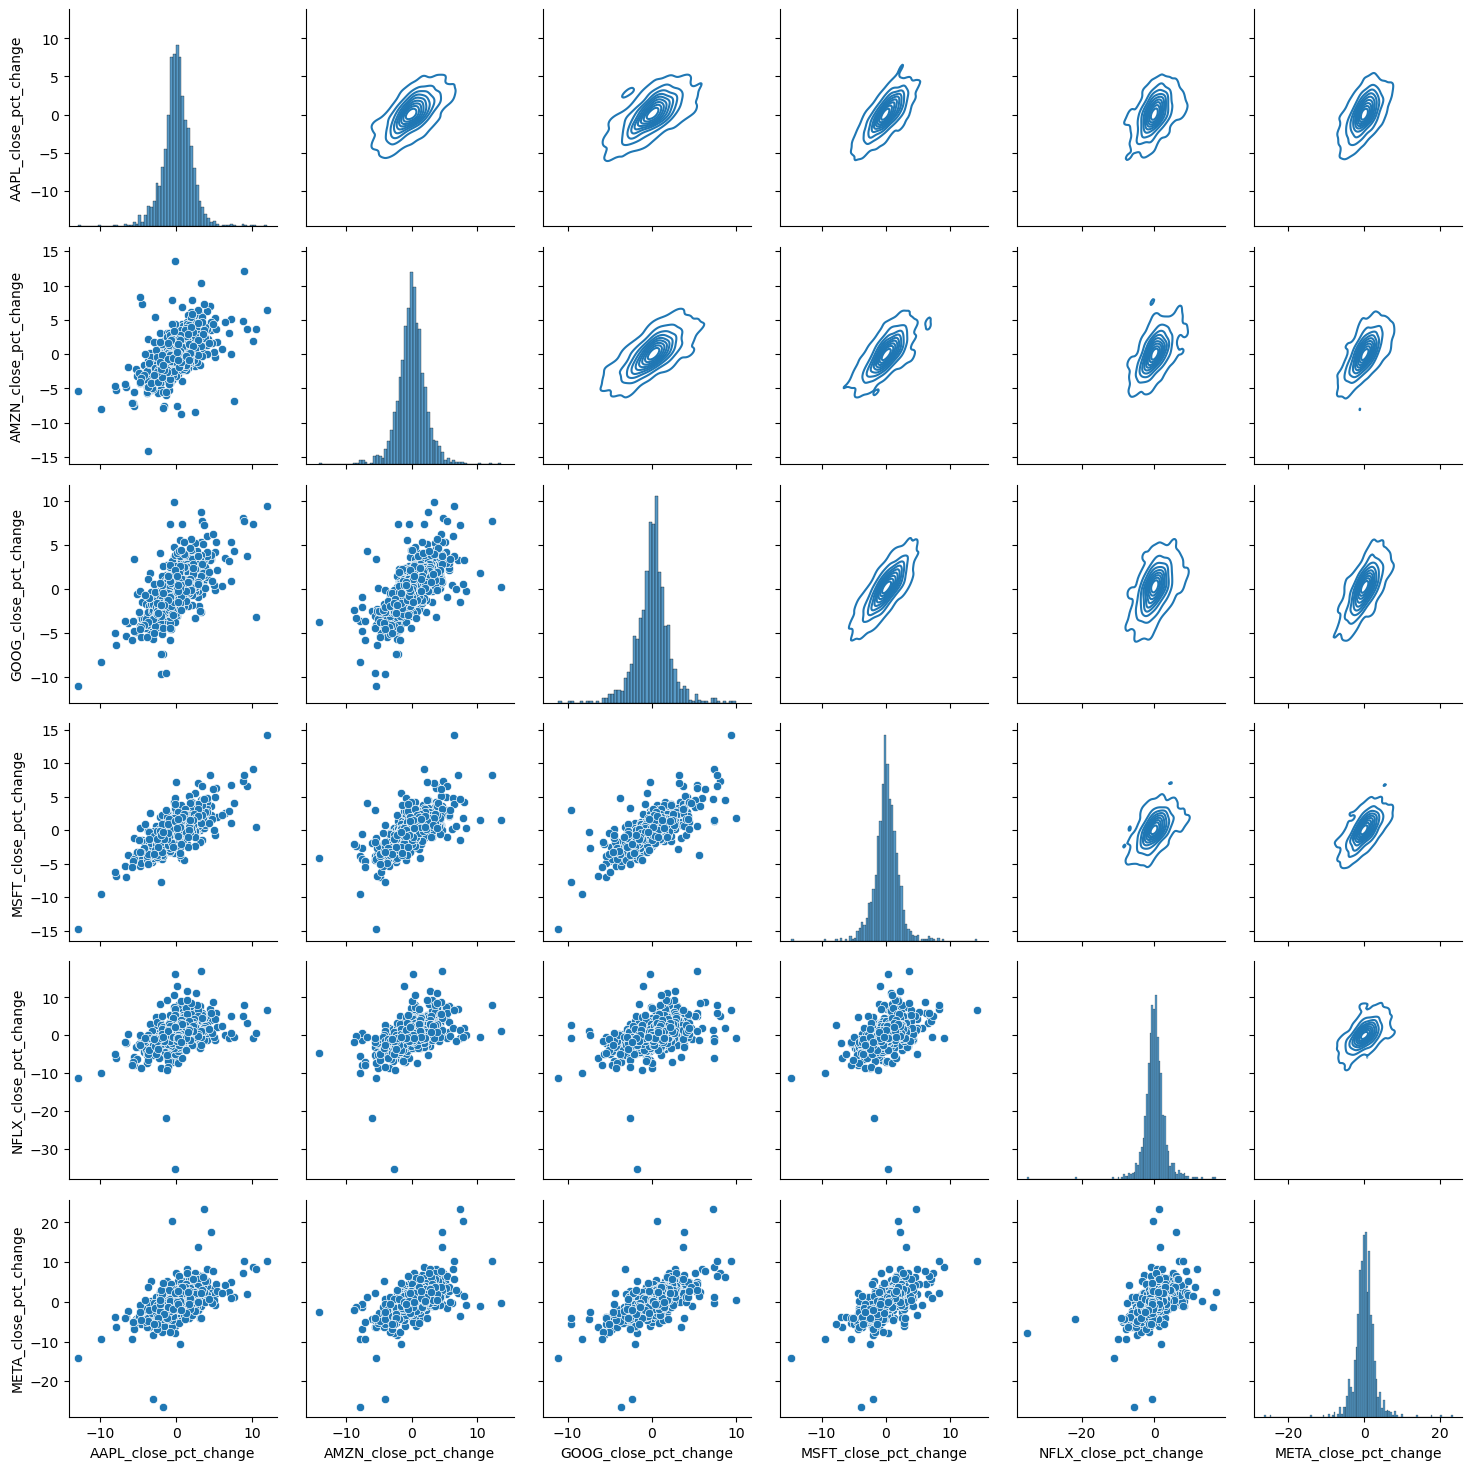

In [281]:
g = sns.PairGrid(data= clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [ ]:
'''

Conclusion :
While Comparing 'AAPL_close_pct_change' to 'AMZN_close_pct_change'  , it shows a linear relationship to some extent..


'''

In [282]:
clsing_p.corr()

,AAPL_close_pct_change,AMZN_close_pct_change,GOOG_close_pct_change,MSFT_close_pct_change,NFLX_close_pct_change,META_close_pct_change
AAPL_close_pct_change,1.000000,0.599381,0.662237,0.750774,0.457896,0.564971
AMZN_close_pct_change,0.599381,1.000000,0.657732,0.679195,0.542698,0.611471
GOOG_close_pct_change,0.662237,0.657732,1.000000,0.757849,0.454851,0.648028
MSFT_close_pct_change,0.750774,0.679195,0.757849,1.000000,0.488305,0.620606
NFLX_close_pct_change,0.457896,0.542698,0.454851,0.488305,1.000000,0.496123
META_close_pct_change,0.564971,0.611471,0.648028,0.620606,0.496123,1.000000
